# Evaluation

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import (confusion_matrix, accuracy_score, 
                            f1_score, recall_score, balanced_accuracy_score, 
                            precision_score, precision_recall_fscore_support)

In [2]:
data = pd.read_parquet('data/test.parquet')
feature_questions = ['dq823','dq789','dq109','dq821','dq8','dq305','dq373','dq420','dq10','dq141','dq9','dq0','dq268','dq198','dq331','dq500','dq296','dq299','dq824','dq95','dq475','dq581','dq294','dq118','dq40','dq725','dq34','dq234','dq136','dq173','dq64','dq117','dq516','dq337','dq579','dq237','dq426','dq657','dq820','dq391','dq348','dq359','dq327','dq379','dq354','dq759','dq470','dq11','dq175','dq60','dq650','dq23','dq586','dq679','dq663','dq158','dq251','dq257','dq307','dq256','dq681','dq270']

In [3]:
X_test = data[feature_questions].dropna()
y_test = data.loc[X_test.index]['political_belief']
feature_encoder = pickle.load(open('models/feature_encoder.pkl', 'rb'))
target_encoder = pickle.load(open('models/target_encoder.pkl', 'rb'))
X_test = feature_encoder.transform(X_test)
y_test = target_encoder.transform(y_test.values.ravel())
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)


X_test shape:  (996, 62)
y_test shape:  (996,)


In [4]:
model = joblib.load(open('models/rf_downsampled_trn_set.joblib', 'rb'))

/usr/local/anaconda3/envs/dating/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.3 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/anaconda3/envs/dating/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.3 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true', labels=range(4))
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
prfs = precision_recall_fscore_support(y_test, y_pred)
print('accuracy', accuracy)
print('balanced accuracy', balanced_accuracy)
print('f1 ', f1)
print('recall ', recall)
print('precision ', precision)
print('among classes: precision, recall, f1, score', prfs)
print(conf_matrix)


accuracy 0.40763052208835343
balanced accuracy 0.4468288896211069
f1  0.4087487156990647
recall  0.40763052208835343
precision  0.47547596737822323
among classes: precision, recall, f1, score (array([0.26143791, 0.18213058, 0.57622739, 0.54545455]), array([0.20833333, 0.7260274 , 0.60433604, 0.24861878]), array([0.23188406, 0.29120879, 0.58994709, 0.34155598]), array([192,  73, 369, 362]))
[[0.20833333 0.31770833 0.3125     0.16145833]
 [0.1369863  0.7260274  0.04109589 0.09589041]
 [0.12466125 0.17073171 0.60433604 0.100271  ]
 [0.15745856 0.31491713 0.27900552 0.24861878]]


In [6]:
prfs = pd.DataFrame(prfs, index=['precision', 'recall', 'f1', 'size'], columns=['centrist', 'conservative', 'liberal', 'other'])

0.726027397260274

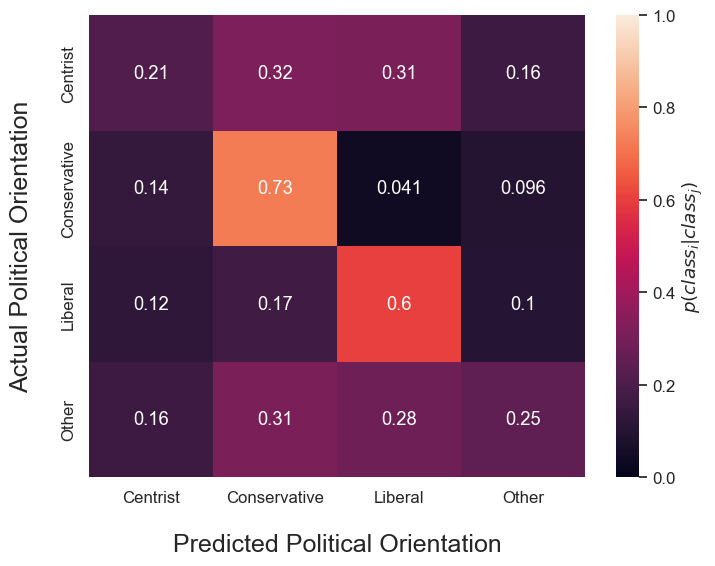

In [23]:
labels = ['Centrist', 'Conservative', 'Liberal', 'Other']
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(conf_matrix_norm, annot=True, vmin=0, vmax=1, cbar_kws={"label": r'$p(class_{i}|class_{j})$'})

ax.set_xlabel("Predicted Political Orientation", fontsize=18, labelpad=20)
ax.xaxis.set_ticklabels(labels)
ax.set_ylabel("Actual Political Orientation", fontsize=18, labelpad=20)
ax.yaxis.set_ticklabels(labels)

cbar = ax.collections[0].colorbar
#cbar.set_ylabel("conditional probability", fontsize=14)
plt.savefig(f'data/images/ConfusionMatrix.png',bbox_inches='tight')
plt.show()


In [10]:
conf_matrix_norm

array([[0.20833333, 0.31770833, 0.3125    , 0.16145833],
       [0.1369863 , 0.7260274 , 0.04109589, 0.09589041],
       [0.12466125, 0.17073171, 0.60433604, 0.100271  ],
       [0.15745856, 0.31491713, 0.27900552, 0.24861878]])